# Data Processing Notebook

This notebook does two things:

- Selects and prepares the data for analysis
- Analyzes data and generates figures for use in other parts of the project (i.e., paper/presentation)

We note that some processing has already been done on the raw data before it went into our database, hence the "preparation" steps taking place here are more part of the analysis and not cleanup/preprocessing steps.

Lets begin.

# Part 1: Selecting Data and Preparing for Analysis

The following steps are related specifically to our data, from the Federal Statistical Office of Switzerland. This dataset contains information on gender pay gaps in Switzerland for various job roles, employment categories, and work types from 2012 to 2023.

Key Variables:

1. Year: The year for which the data is collected (2012 to 2023).
2. Job Role: The specific job role or profession.
3. Employment Category: The employment category (e.g., self-employed, full-time, part-time).
4. Work Type: The type of work (e.g., full-time, part-time).
5. Gross Pay Men: The average gross pay for men in the specified category.
6. Gross Pay Women: The average gross pay for women in the specified category.
7. Gender Pay Gap: The absolute difference in pay between men and women.
8. Pay Gap Percentage: The percentage difference in pay between men and women, calculated as (Gross Pay Men - Gross Pay Women) / Gross Pay Men * 100.
This dataset can be used to analyze gender pay disparities in Switzerland across different job roles and employment categories..

In [2]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns
from sklearn.impute import KNNImputer
from pandas import Categorical
# Load the data
data = pd.read_csv("F:\\FALL SEMESTER 2024\\Digital Tools for Finance\\Gender-Pay-Gap-Switzerland\\data\\processes data\\Gross pay.csv",header=0,
        usecols=["Year", "Job Role", "Employment Category","Work Type","Gross Pay Men","Gross Pay Women","Gender Pay Gap","Pay Gap Percentage"])
df = pd.DataFrame(data)
#df.columns = df.columns.str.strip()
#print(df.head()) 



In [4]:
new_df = df.dropna()

# Part 2: KNN Imputation for Missing Values
KNN imputation is a technique used to fill in missing values in a dataset. It works by identifying the k-nearest neighbors to a data point with missing values, and then imputing the missing value with the average or median value of the nearest neighbors. It first identifies the missing values, selects only numerical columns for imputation, initializes a KNNImputer with 3 nearest neighbors, fits the imputer to the data and imputes missing values, replaces the original values with the imputed ones, verifies the absence of remaining missing values, and finally displays the imputed DataFrame. This process ensures a clean and complete dataset for subsequent analysis.

In [6]:
print("Original Data with Missing Values:")
print(df.isnull().sum())

Original Data with Missing Values:
Year                    0
Job Role                0
Employment Category     0
Work Type               0
Gross Pay Men           1
Gross Pay Women        11
Gender Pay Gap          2
Pay Gap Percentage     14
dtype: int64


In [8]:
# Define columns for KNN imputation (numerical columns only)
numerical_columns = ['Gross Pay Men', 'Gross Pay Women', 'Gender Pay Gap', 'Pay Gap Percentage']

# Ensure the dataset has only numeric columns for KNN
knn_data = df[numerical_columns]

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=3)  # Use 3 nearest neighbors; adjust as needed

# Apply the imputer to the data
imputed_data = imputer.fit_transform(knn_data)

# Replace the original columns with the imputed values
df[numerical_columns] = imputed_data

# Display data after imputation
print("\nData After KNN Imputation:")
print(df)

# Check if there are still missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Data After KNN Imputation:
     Year                          Job Role Employment Category  Work Type  \
0    2023       Executives, senior managers       Self Employed  Full Time   
1    2023   Academic/scientific professions       Self Employed  Full Time   
2    2023          Intermediate professions       Self Employed  Full Time   
3    2023              Administrative staff       Self Employed  Full Time   
4    2023           Service and sales staff       Self Employed  Full Time   
..    ...                               ...                 ...        ...   
427  2012           Service and sales staff           Employees  Part Time   
428  2012                           Farmers           Employees  Part Time   
429  2012     Craftsmen and skilled workers           Employees  Part Time   
430  2012               Drivers and fitters           Employees  Part Time   
431  2012                 Unskilled workers           Employees  Part Time   

     Gross Pay Men  Gross Pay Women

# Part 3: Compute and Display Descriptive Statistics

This code snippet calculates and displays basic descriptive statistics for numerical columns in a DataFrame df. It uses the describe() method to obtain summary statistics like count, mean, standard deviation, minimum, quartiles, and maximum.
It also calculates specific statistical measures: The mean pay gap percentage represents the average difference in pay between genders across the entire dataset. The median pay gap percentage indicates the middle value when all pay gaps are sorted, providing a robust measure of central tendency. The standard deviation quantifies the variability or spread of pay gaps around the mean. The maximum pay gap signifies the largest difference in pay observed between any two genders, while the minimum pay gap represents the smallest such difference.
Code snippet performs grouped analysis for Average Pay Gap Percentage by Job Role, Sum of Pay Gaps by Work Type and Count of Records by Employment Catergory.


In [10]:
# Compute descriptive statistics
desc_stats = df.describe()

# Display the descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(desc_stats)

# Compute additional statistics
print("\nAdditional Statistics:")
print(f"Mean Pay Gap Percentage: {df['Pay Gap Percentage'].mean():.2f}%")
print(f"Median Pay Gap Percentage: {df['Pay Gap Percentage'].median():.2f}%")
print(f"Standard Deviation of Pay Gap Percentage: {df['Pay Gap Percentage'].std():.2f}%")
print(f"Max Pay Gap: {df['Gender Pay Gap'].max():,.2f}")
print(f"Min Pay Gap: {df['Gender Pay Gap'].min():,.2f}")

# Grouped Descriptive Statistics
print("\nGrouped Statistics:")
# Average Pay Gap Percentage by Job Role
avg_gap_by_role = df.groupby("Job Role")["Pay Gap Percentage"].mean().sort_values(ascending=False)
print("Average Pay Gap Percentage by Job Role:")
print(avg_gap_by_role)

# Sum of Pay Gaps by Work Type
sum_gap_by_work = df.groupby("Work Type")["Gender Pay Gap"].sum().sort_values(ascending=False)
print("\nSum of Pay Gaps by Work Type:")
print(sum_gap_by_work)

# Count of Records by Employment Category
record_count_by_category = df["Employment Category"].value_counts()
print("\nRecord Count by Employment Category:")
print(record_count_by_category)

Descriptive Statistics for Numerical Columns:
              Year  Gross Pay Men  Gross Pay Women  Gender Pay Gap  \
count   432.000000     432.000000       432.000000      432.000000   
mean   2017.500000   61128.935185     46495.061728    15132.561728   
std       3.456055   27711.796022     22271.584044    12619.577445   
min    2012.000000   13300.000000      6400.000000   -22300.000000   
25%    2014.750000   37500.000000     26975.000000     7475.000000   
50%    2017.500000   61100.000000     45550.000000    13550.000000   
75%    2020.250000   74125.000000     59625.000000    21000.000000   
max    2023.000000  136000.000000    118900.000000    70800.000000   

       Pay Gap Percentage  
count          432.000000  
mean            22.400194  
std             20.684530  
min           -163.970588  
25%             14.484626  
50%             21.320627  
75%             32.845150  
max             82.758621  

Additional Statistics:
Mean Pay Gap Percentage: 22.40%
Median Pay Gap 

# Part 4: Bar Chart: Comparing Male vs. Female Salaries by Job Role
This code snippet creates a bar chart to visualize the differences in gross pay between men and women across various job roles in the dataset df. This code creates a bar chart comparing salaries between men and women across job roles. It defines the chart size, uses Seaborn barplot to create separate bars for each gender using data from specific columns. Labels, title, legend, and spacing adjustments are applied before displaying the final chart.

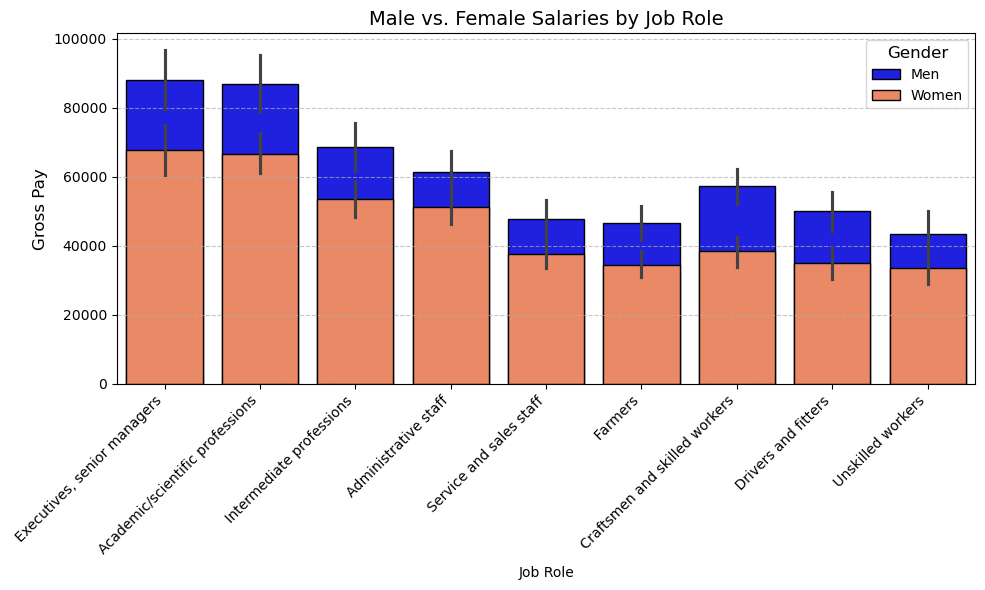

In [12]:
# Bar Chart: Comparing male vs. female salaries by job role
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Job Role", y="Gross Pay Men", color="blue", label="Men", edgecolor="black")
sns.barplot(data=df, x="Job Role", y="Gross Pay Women", color="coral", label="Women", edgecolor="black")
plt.xticks(rotation=45, ha="right")  # Maintain rotated x-axis labels
plt.ylabel("Gross Pay", fontsize=12)  # Increase y-axis label font size
plt.title("Male vs. Female Salaries by Job Role", fontsize=14)  # Increase title font size
plt.legend(title="Gender", title_fontsize=12)  # Add legend title and adjust its font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines for better readability
plt.tight_layout()
plt.show()

# Part 5: Line Chart: Tracking pay gap trends over job roles
The line chart visualizes the pay gap percentage across different job roles. Each data point represents the pay gap percentage for a specific job role. The trend of the line indicates how the pay gap varies among different job roles. This chart is crucial for identifying job roles with significant pay disparities and for informing targeted interventions to address gender pay inequality. It provides a clear visual representation of the issue and helps prioritize areas for improvement.

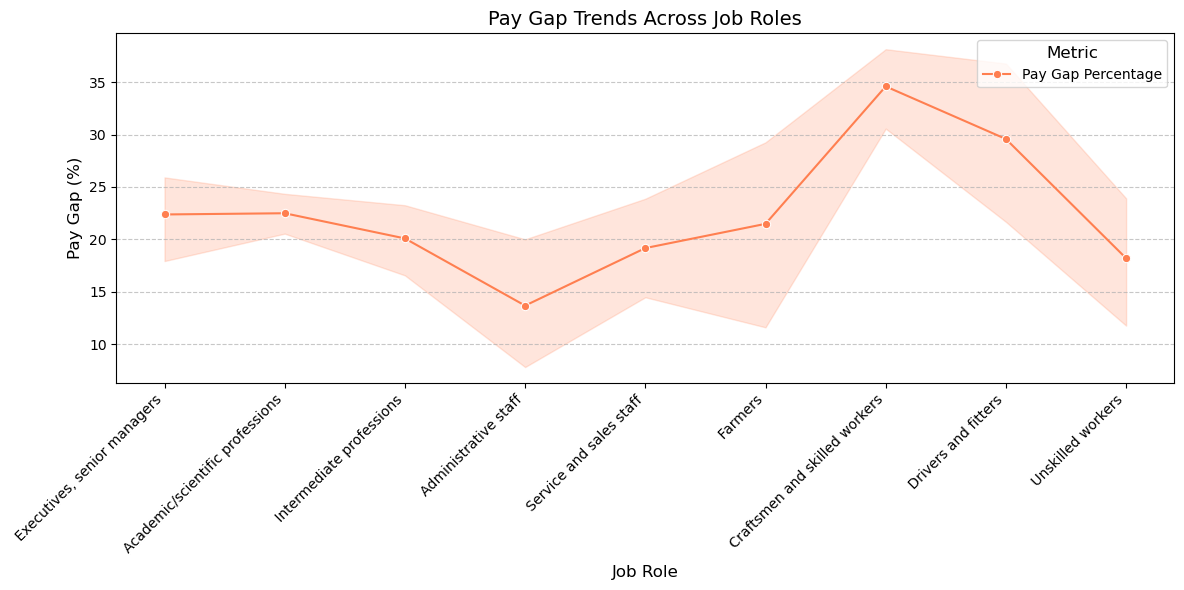

In [14]:
# Line Chart: Tracking pay gap trends over job roles #box plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Job Role", y="Pay Gap Percentage", marker="o",color="coral", label="Pay Gap Percentage")
# Customize labels, title, and legend
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Pay Gap (%)", fontsize=12)
plt.title("Pay Gap Trends Across Job Roles", fontsize=14)
plt.legend(title="Metric", title_fontsize=12)

# Add a grid with subtle transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for spacing adjustments
plt.tight_layout()
plt.show()

# Part 6: Heatmap: Showing the severity of the gap by category and work type
The data heatmap aims to visualize the severity of the gender pay gap across different job roles and work types within the dataset. Here's a breakdown of the information it conveys:

1. Color Intensity: The color intensity in each cell represents the pay gap percentage for a specific job role within a particular work type. Darker colors (typically towards red in the chosen colormap) indicate a larger pay gap, while lighter colors (typically towards green) indicate a smaller pay gap.
2. Job Role vs. Work Type: The heatmap allows you to compare pay gaps across different job roles within the same work type (columns) and see how the pay gap varies between different work types for the same job role (rows).

This visual representation helps identify patterns and potential areas of concern regarding gender pay inequality. For example, the heatmap might reveal job roles within a specific work type that consistently have high pay gaps, or work types where the pay gap varies significantly across different job roles.

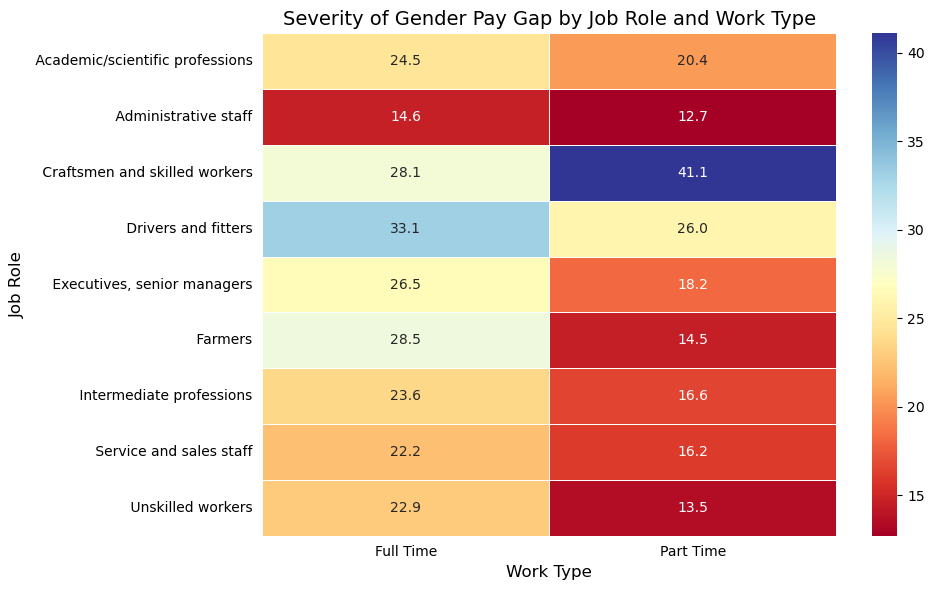

In [16]:
# Heatmap: Showing the severity of the gap by category and work type
heatmap_data = df.pivot_table(values="Pay Gap Percentage", index="Job Role", columns="Work Type")
cmap = "YlGnBu_r"  # Reverse YlGnBu for better contrast (green to red)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="RdYlBu", linewidths=0.5)
plt.title("Severity of Gender Pay Gap by Job Role and Work Type", fontsize=14)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Job Role", fontsize=12)
plt.tick_params(bottom=False, left=False)  # Remove unnecessary ticks

# Tight layout for spacing adjustments
plt.tight_layout()
plt.show()

# Part 7: Boxplot Distribution of Gross Pay by Gender Across Job Roles
The boxplot visualizes the distribution of gross pay for men and women across different job roles. It provides insights into:

1. Central Tendency: The median (the line within the box) shows the middle value of gross pay for each gender within a job role.
2. Spread: The box represents the interquartile range (IQR), which contains 50% of the data. A wider box indicates greater variability in pay.
3. Outliers: The dots outside the box represent outliers, which are data points significantly different from the majority.
4. Gender Differences: By comparing the boxes and whiskers for men and women within each job role, you can identify potential pay disparities. A higher median or a wider box for one gender might suggest a pay gap.

Overall, the boxplot helps to understand how the distribution of gross pay varies by gender and job role, highlighting potential areas of pay inequality and the extent of variation within each group

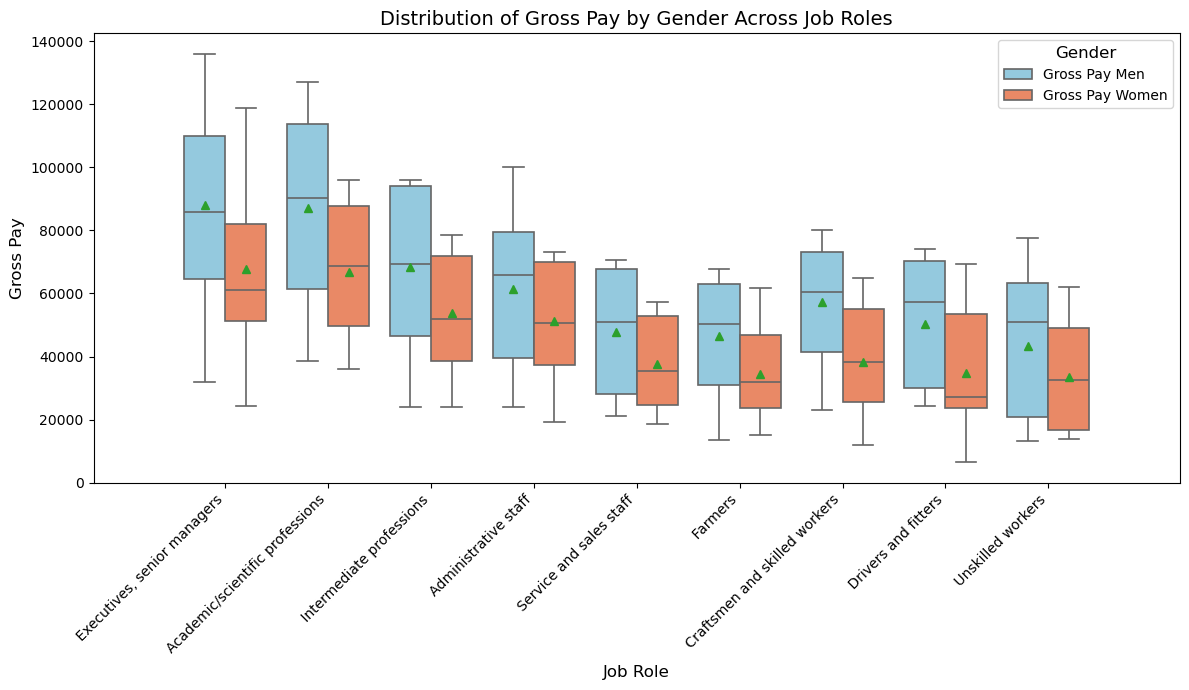

In [18]:

df_melted = df.melt(id_vars=["Job Role"], value_vars=["Gross Pay Men", "Gross Pay Women"], 
                    var_name="Gender", value_name="Gross Pay")
palette = ["skyblue", "coral"]  # More distinct colors for genders
plt.figure(figsize=(12, 7))

# Create the boxplot with styling
sns.boxplot(
    data=df_melted,
    x="Job Role",
    y="Gross Pay",
    hue="Gender",
    showmeans=True,  # Display means as markers
    palette=palette,
    linewidth=1.2,  # Thicker boxplot lines
)

# Customize labels, title, and legend
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Gross Pay", fontsize=12)
plt.title("Distribution of Gross Pay by Gender Across Job Roles", fontsize=14)
plt.legend(title="Gender", title_fontsize=12)

# Reduce white space around the plot
plt.margins(x=0.1)  # Adjust left and right margins

# Tight layout for spacing adjustments
plt.tight_layout()
plt.show()

In [ ]:
# Part 8: Line Chart: Total Pay Gap by Work Type
This barplot allows you to compare the total gender pay gaps across different work types. The height of each bar represents the sum of the gender pay gaps for that specific work type.

C:\Users\saksh\AppData\Local\Temp\ipykernel_14492\1104514213.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




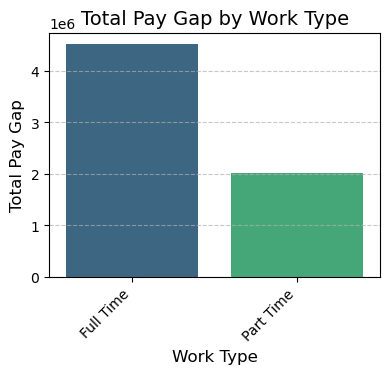

In [39]:
plt.figure(figsize=(4, 4))  # Increased figure size for better readability
gap_by_work_type = df.groupby("Work Type")["Gender Pay Gap"].sum().reset_index()
sns.barplot(x="Work Type", y="Gender Pay Gap", data=gap_by_work_type, palette="viridis")
plt.title("Total Pay Gap by Work Type", fontsize=14)  # Increased font size for title
plt.xlabel("Work Type", fontsize=12)  # Added label for x-axis
plt.ylabel("Total Pay Gap", fontsize=12)  # Increased font size for y-axis
plt.xticks(rotation=45, ha="right")  # Rotated x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines on y-axis
plt.tight_layout()
plt.show()

# Part 9: Gender Pay Gap Trend across Job Roles
This graph shows the trend of the gender pay gap over time across different job roles. Each line represents a job role, allowing for a comparison of how the pay gap has evolved over the years. Job roles with consistently higher or lower gaps are easily identifiable, highlighting disparities between them. Additionally, the graph helps detect whether the gender pay gap in job roles are improving or worsening in terms of pay equity over the years, offering insights into progress or stagnation.

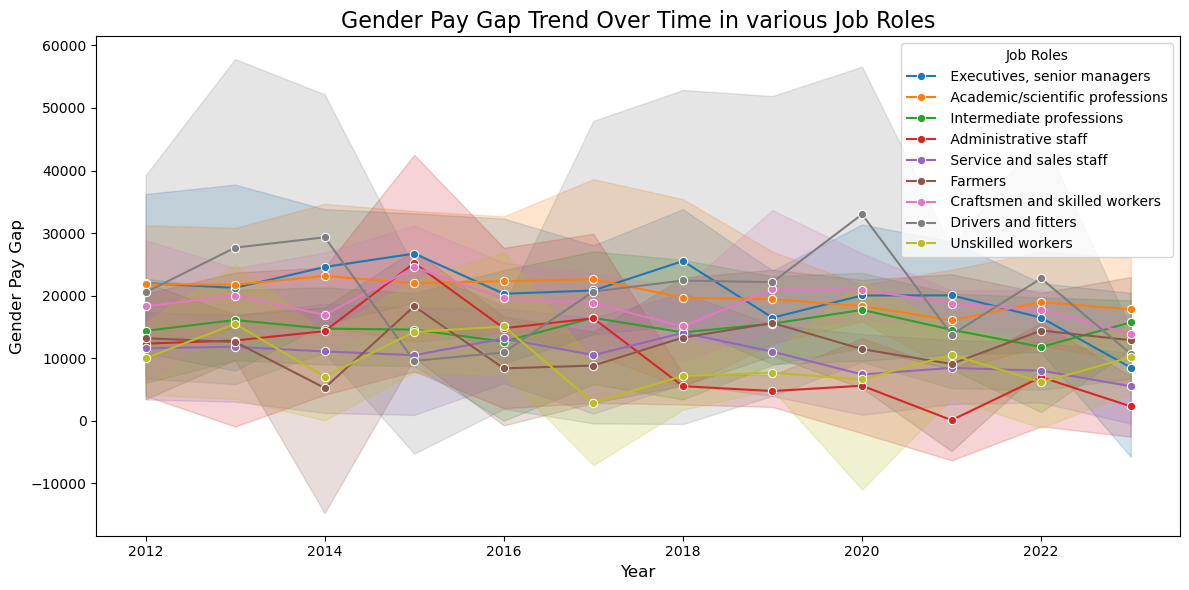

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="Year",
    y="Gender Pay Gap",
    hue="Job Role",
    marker="o",
    palette="tab10"
)
plt.title("Gender Pay Gap Trend Over Time in various Job Roles", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gender Pay Gap", fontsize=12)
plt.legend(title="Job Roles")
plt.tight_layout()
plt.show()


# Part 10: Line Chart: Data Analysis for Gender Pay Gap Across Regions

This dataset appears to be related to gender pay gaps in a various regions across various industries and professional positions. Here are the key variables:

1. Year: Indicates the year for which the data was collected (2020 in this case).
2. Region: Specifies the geographical region (Lake Geneva).
3. Industry: Categorizes the industry sector (e.g., manufacturing, services, construction).
4. Professional Position Category: Defines the professional position or job role (e.g., total, specific roles).
5. Gross Pay Total: Total gross pay for all employees in the specified category.
6. Gross Pay Women: Average gross pay for women in the specified category.
7. Gross Pay Men: Average gross pay for men in the specified category.
8. Gender Pay Gap: The absolute difference between the average gross pay of men and women.
9. Pay Gap Percentage: The percentage difference in pay between men and women, calculated as (Gross Pay Men - Gross Pay Women) / Gross Pay Men * 100.

This dataset can be used to analyze gender pay disparities within different industries, job roles, and employment categories within the Lake Geneva region.

In [22]:
data2 = pd.read_csv("F:\\FALL SEMESTER 2024\\Digital Tools for Finance\\Gender-Pay-Gap-Switzerland\\data\\processes data\\Regions.csv",header=0,
        usecols=["Year", "Region","Gross Pay Women","Gross Pay Men","Gender Pay Gap"])
df2 = pd.DataFrame(data2)
df2.columns = df2.columns.str.strip()
print(df2.head(10)) 

   Year       Region  Gross Pay Women  Gross Pay Men  Gender Pay Gap
0  2020  Lake Geneva             6544           6866             322
1  2020  Lake Geneva             6159           6673             514
2  2020  Lake Geneva             6154           7099             945
3  2020  Lake Geneva             6469           6005            -464
4  2020  Lake Geneva             5892           6234             342
5  2020  Lake Geneva             6592           7000             408
6  2020  Lake Geneva             5377           6179             802
7  2020  Lake Geneva             5931           6123             192
8  2020  Lake Geneva             4328           4642             314
9  2020  Lake Geneva             7226           8876            1650


# Part 11: Gender Pay Gap Trend
This graph shows the trend of the gender pay gap over time across different regions. Each line represents a region, allowing for a comparison of how the pay gap has evolved over the years. Regions with consistently higher or lower gaps are easily identifiable, highlighting disparities between regions. Additionally, the graph helps detect whether regions are improving or worsening in terms of pay equity over the years, offering insights into regional progress or stagnation.

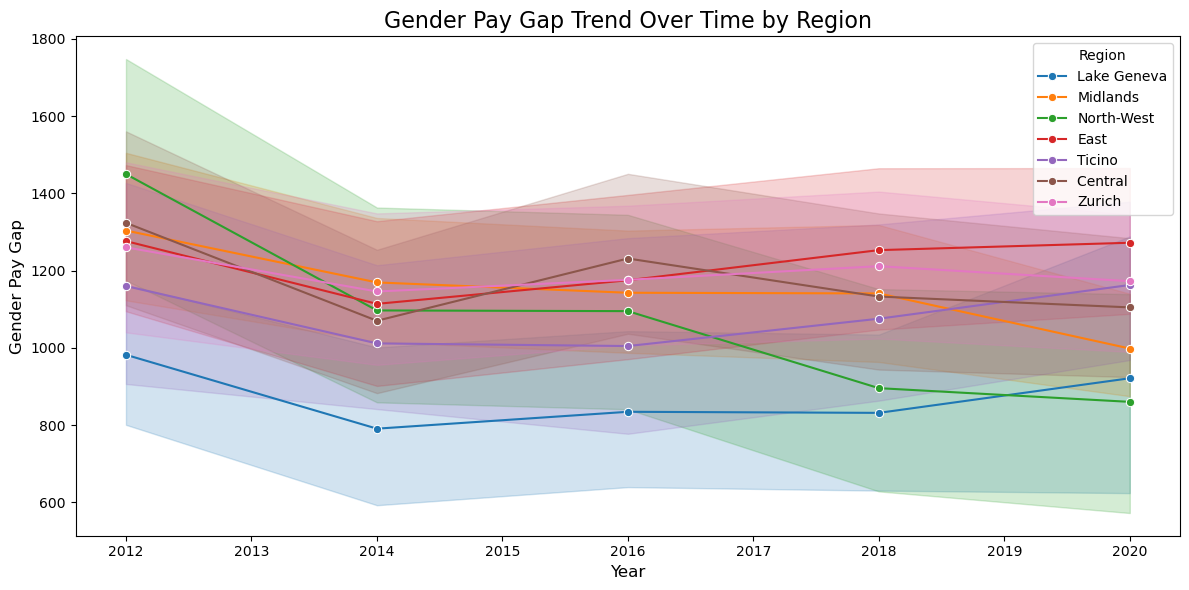

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df2,
    x="Year",
    y="Gender Pay Gap",
    hue="Region",
    marker="o",
    palette="tab10"
)
plt.title("Gender Pay Gap Trend Over Time by Region", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gender Pay Gap", fontsize=12)
plt.legend(title="Region")
plt.tight_layout()
plt.show()


# Part 12: Gender Pay Gap by Regions
This bar chart illustrates the gender pay gap across different regions in Switzerland. Each bar represents the magnitude of the pay gap in a specific region, with higher bars indicating larger disparities between men's and women's gross pay. The chart makes it easy to identify regions with the most significant gaps, as well as those closer to pay equity.

C:\Users\saksh\AppData\Local\Temp\ipykernel_14492\2166332891.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\saksh\AppData\Local\Temp\ipykernel_14492\2166332891.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




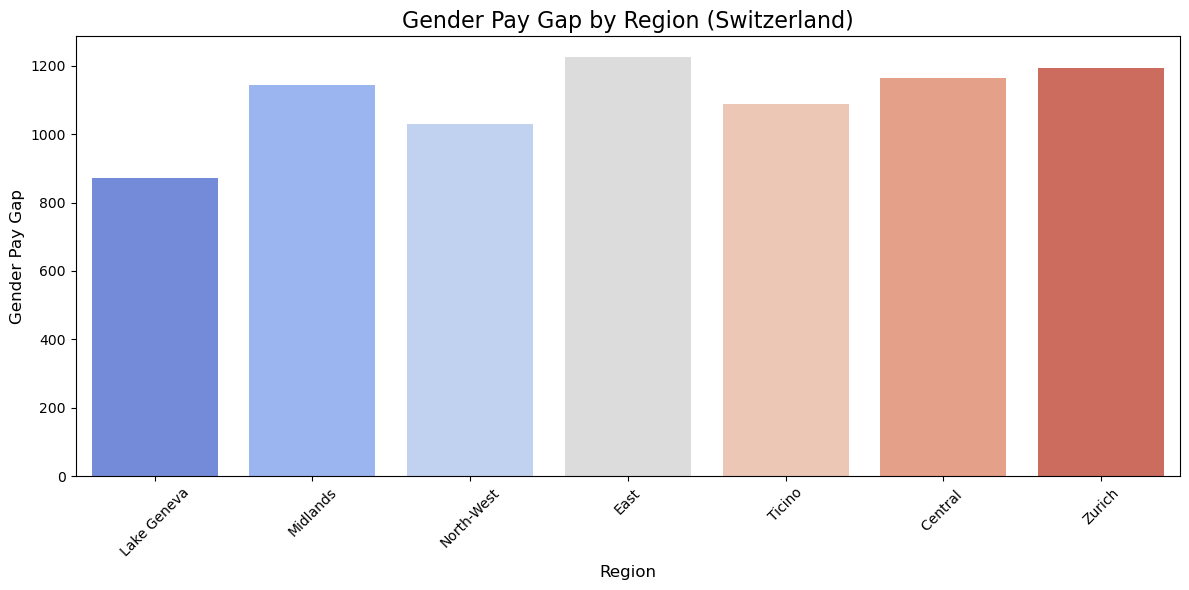

In [52]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df2,
    x="Region",
    y="Gender Pay Gap",
    palette="coolwarm",
    ci=None
)
plt.title("Gender Pay Gap by Region (Switzerland)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Gender Pay Gap", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 13: Boxplot of Gender Pay Gap across Regions
This boxplot visualizes the distribution of the gender pay gap across different regions. Each box represents the range of pay gaps in a region, with the central line indicating the median gap and the box edges showing the interquartile range (middle 50% of values). Outliers are represented as individual points, highlighting regions or years with unusually high or low pay gaps. The graph helps compare variability in the gender pay gap across regions, showing which regions have consistent disparities versus those with fluctuating or extreme values.

C:\Users\saksh\AppData\Local\Temp\ipykernel_14492\3455584972.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




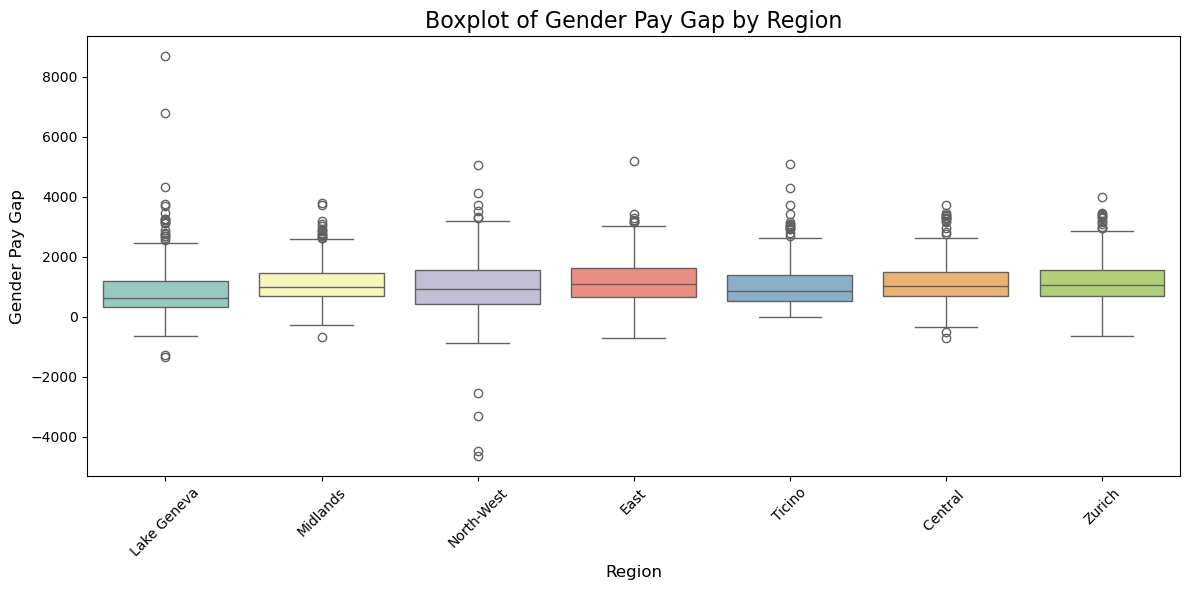

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df2, 
    x="Region", 
    y="Gender Pay Gap", 
    palette="Set3"
)
plt.title("Boxplot of Gender Pay Gap by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Gender Pay Gap", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 14: Yearly Trends in Gross Pay by Gender
This graph visualizes the trends in gross pay for both men and women across different years. The data is melted from a wider dataframe to separate gross pay for men and women into distinct lines. The color and style of the lines differentiate between genders, allowing for easy comparison. By looking at the slopes and positions of the lines, we can understand how gross pay for men and women changes over the years.

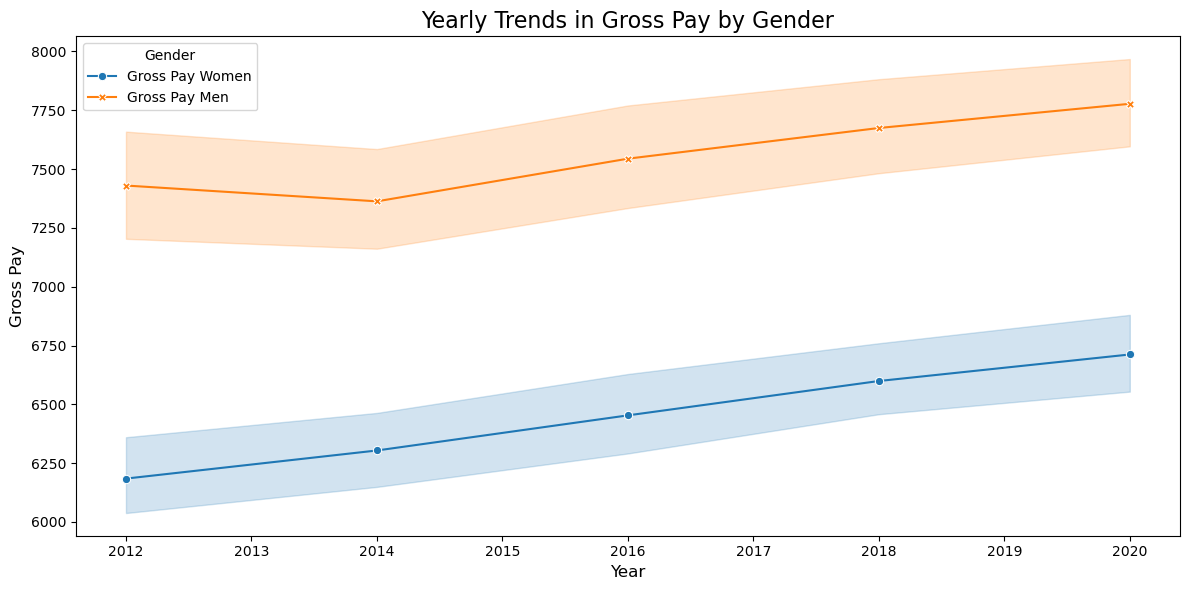

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df2.melt(id_vars=["Year", "Region"], value_vars=["Gross Pay Women", "Gross Pay Men"]),
    x="Year", 
    y="value", 
    hue="variable", 
    style="variable", 
    markers=True, 
    dashes=False, 
    palette="tab10"
)
plt.title("Yearly Trends in Gross Pay by Gender", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gross Pay", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Part 15: Gross Pay Ratio (Women/Men) by Region
This graph compares the average salaries of women to men across different regions. The y-axis shows the ratio, with a value of 1 indicating equal pay. Regions are displayed on the x-axis. The horizontal red line highlights equal pay. By looking at the bars above or below the line, we can see if women in a particular region earn more or less than men on average.

C:\Users\saksh\AppData\Local\Temp\ipykernel_14492\1569649231.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




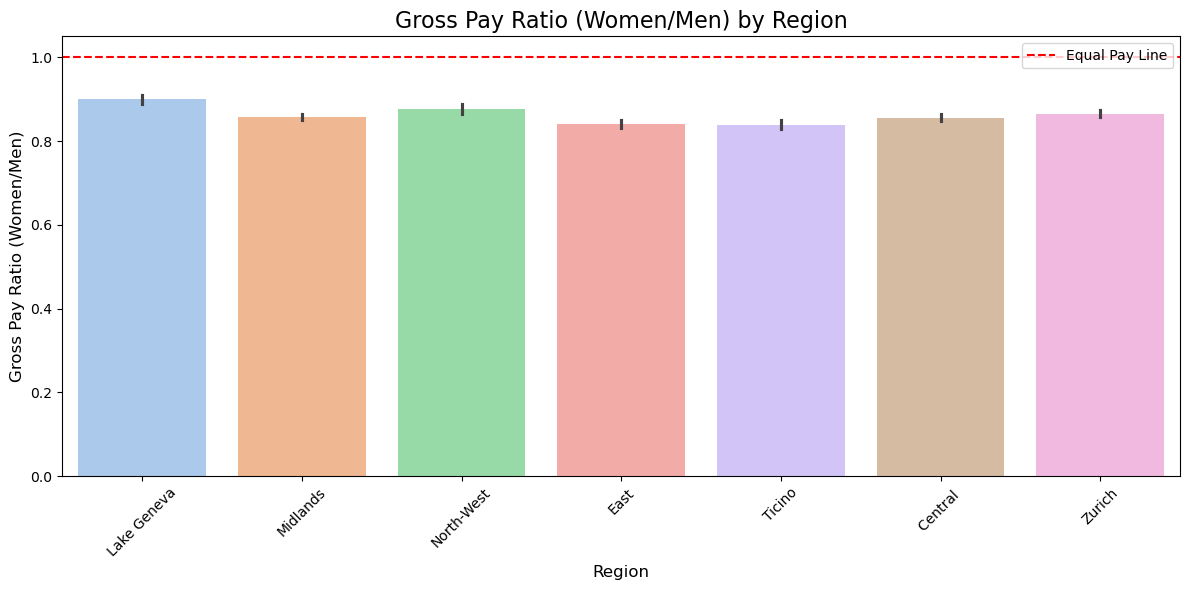

In [36]:
df2["Gross Pay Ratio"] = df2["Gross Pay Women"] / df2["Gross Pay Men"]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df2, 
    x="Region", 
    y="Gross Pay Ratio", 
    palette="pastel"
)
plt.axhline(1, color="red", linestyle="--", label="Equal Pay Line")
plt.title("Gross Pay Ratio (Women/Men) by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Gross Pay Ratio (Women/Men)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion
There exits a Gender Pay Gap and we can conclude that Women are not paid equally across industries, regions, type of work and positions in Switzerland.